# Variable

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
state = tf.Variable(0, name='counter')
print state.name
one = tf.constant(1)

new_value = tf.add(state,one)
update = tf.assign(state, new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print sess.run(state)

counter_2:0
1
2
3


# Session

In [4]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                      [2]])
product = tf.matmul(matrix1, matrix2)

#sess = tf.Session()
#result=sess.run(product)
#print(result)
#sess.close()

with tf.Session() as sess:
    result = sess.run(product)
    print result


[[12]]


# Placeholder

In [7]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print sess.run(output, feed_dict={input1:[7.], input2:[2.]})

[ 14.]


# 神经网络

## 添加层

In [12]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])) + 0.1
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return output

## 训练网络

In [14]:
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss =tf.reduce_mean( tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]) )
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
        if i % 50 == 0:
            print sess.run(loss, feed_dict={xs:x_data, ys:y_data})

0.0216402
0.00381295
0.00342173
0.00318462
0.00300511
0.0028897
0.00281799
0.00276282
0.00272121
0.00269403
0.0026729
0.00265544
0.00263795
0.0026249
0.00261625
0.00260991
0.00260517
0.00260128
0.00259836
0.00259618


## 结果可视化

* matplotlib

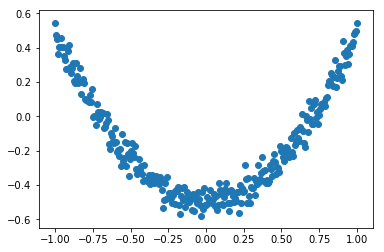

In [20]:
# 在ide里面或者是直接python运行文件，可以看到一个动态的图的过程
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()
# plt.show(block=False)

with tf.Session() as sess:
    sess.run(init)

    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            # print sess.run(loss, feed_dict={xs:x_data, ys:y_data})
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            plt.pause(0.1)

* tensorboard

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1,out_size])+0.1, name='b')
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights) , biases)
        if activation_function is None:
            output = Wx_plus_b
        else:
            output = activation_function(Wx_plus_b)
        return output

# make some real data
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# placeholder for input:x,y
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32,[None,1], name='x_inpiut')
    ys = tf.placeholder(tf.float32,[None,1], name='y_input')

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

with tf.name_scope('lose'):
    loss =tf.reduce_mean( tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]) )
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()

writer = tf.summary.FileWriter('./', sess.graph)

# Very important step
sess.run(init)

In [ ]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(n_layer, inputs, in_size, out_size, activation_function=None):

    with tf.name_scope('layer%d' % n_layer):

        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
            tf.summary.histogram('/weights', Weights)

        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1,out_size])+0.1, name='b')
            tf.summary.histogram('/biases', biases)

        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights) , biases)
            tf.summary.histogram('Wx_plus_b', Wx_plus_b)

        if activation_function is None:
            output = Wx_plus_b
        else:
            output = activation_function(Wx_plus_b)

        tf.summary.histogram('/output', output)
        return output

# make some real data
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# placeholder for input:x,y
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32,[None,1], name='x_inpiut')
    ys = tf.placeholder(tf.float32,[None,1], name='y_input')

# Add hidden layer
l1 = add_layer(1, xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(2,l1, 10, 1, activation_function=None)

# Erro / Loss
with tf.name_scope('lose'):
    loss =tf.reduce_mean( tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]) )
    tf.summary.scalar('loss', loss)

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# Session
sess = tf.Session()

# Summary
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('./logs', sess.graph)

# Very important step, init Variables
sess.run(tf.global_variables_initializer())

# Train
for i in range(1000):
    feed_dict = {xs:x_data, ys:y_data}
    sess.run(train_step, feed_dict)

    if i % 50 == 0:
        result = sess.run(merged, feed_dict)
        writer.add_summary(result, i)

* 找到目录，执行 tensorboard --logdir='./logs'
* 打开浏览器，点击Graph便可看到显示

# 分类